In [ ]:
#Linear Transformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## SQUAD Dataset

In [ ]:
!pip install datasets==1.0.2
!pip install tqdm==4.55.1

In [ ]:
!mkdir '/content/drive/My Drive/Text Mining TDDE16/dataset'

In [ ]:
from datasets import load_dataset
train_dataset = load_dataset('squad', split='train')
valid_dataset = load_dataset('squad', split='validation')

Reusing dataset squad (/root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41)
Reusing dataset squad (/root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41)


In [ ]:
train_dataset.shape, valid_dataset.shape

((87599, 5), (10570, 5))

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

df_train = pd.DataFrame( columns = ['context', 'answer','question'])
df_validation = pd.DataFrame( columns = ['context', 'answer','question'])
df_test = pd.DataFrame( columns = ['context', 'answer','question'])

In [ ]:
count = 0
      
for index,val in enumerate(tqdm(train_dataset)):
    passage = val['context']
    question = val['question']
    answer = val['answers']['text'][0]
    no_of_words = len(answer.split())
    
    if no_of_words < 7:
        df_train.loc[count]= [passage] + [answer] + [question] 
        count += 1

  0%|          | 0/87599 [00:00<?, ?it/s]

In [ ]:
df_train.shape

(78664, 3)

In [ ]:
count = 0
      
for index,val in enumerate(tqdm(valid_dataset)):
    passage = val['context']
    question = val['question']
    answer = val['answers']['text'][0]
    no_of_words = len(answer.split())
    
    if no_of_words < 7:
        df_validation.loc[count]= [passage] + [answer] + [question] 
        count += 1

  0%|          | 0/10570 [00:00<?, ?it/s]

In [ ]:
df_validation.shape

(9652, 3)

In [ ]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)
df_validation = shuffle(df_validation)

In [ ]:
df_new1, df_test = df_train.iloc[:70000,:], df_train.iloc[70000:,:]

In [ ]:
df_new1.shape, df_test.shape

((70000, 3), (8664, 3))

In [ ]:
train_save_path = '/content/drive/My Drive/Text Mining TDDE16/dataset/squad_train.csv'
validation_save_path = '/content/drive/My Drive/Text Mining TDDE16/dataset/squad_val.csv'
test_save_path = '/content/drive/My Drive/Text Mining TDDE16/dataset/squad_test.csv'

df_new1.to_csv(train_save_path, index = False)
df_validation.to_csv(validation_save_path, index = False)
df_test.to_csv(test_save_path, index = False)

In [ ]:
pd.set_option("display.max_colwidth", 1)
df_train.head()

,context,answer,question
827,"Beyoncé's lighter skin color and costuming has drawn criticism from some in the African-American community. Emmett Price, a professor of music at Northeastern University, wrote in 2007, that he thinks race plays a role in many of these criticisms, saying white celebrities who dress similarly do not attract as many comments. In 2008, L'Oréal was accused of whitening her skin in their Feria hair color advertisements, responding that ""it is categorically untrue"", and in 2013, Beyoncé herself criticized H&M for their proposed ""retouching"" of promotional images of her, and according to Vogue requested that only ""natural pictures be used"".",L'Oréal,Which company was accused of coloring Beyonce's hair?
3801,"Democratic Party candidates were consistently elected to local office, increasing the city's ties to the South and its dominant party. In 1861, Mayor Fernando Wood called on the aldermen to declare independence from Albany and the United States after the South seceded, but his proposal was not acted on. Anger at new military conscription laws during the American Civil War (1861–1865), which spared wealthier men who could afford to pay a $300 (equivalent to $5,766 in 2016) commutation fee to hire a substitute, led to the Draft Riots of 1863, whose most visible participants were ethnic Irish working class. The situation deteriorated into attacks on New York's elite, followed by attacks on black New Yorkers and their property after fierce competition for a decade between Irish immigrants and blacks for work. Rioters burned the Colored Orphan Asylum to the ground, but more than 200 children escaped harm due to efforts of the New York City Police Department, which was mainly made up of Irish immigrants. According to historian James M. McPherson (2001), at least 120 people were killed. In all, eleven black men were lynched over five days, and the riots forced hundreds of blacks to flee the city for Williamsburg, Brooklyn, as well as New Jersey; the black population in Manhattan fell below 10,000 by 1865, which it had last been in 1820. The white working class had established dominance. Violence by longshoremen against black men was especially fierce in the docks area. It was one of the worst incidents of civil unrest in American history.",120,About how many people died during the Draft Riots of 1863?
52031,"In South Africa, a ""two apex"" system existed from 1994 to 2013. The Supreme Court of Appeal (SCA) was created in 1994 and replaced the Appellate Division of the Supreme Court of South Africa as the highest court of appeal in non-constitutional matters. The SCA is subordinate to the Constitutional Court, which is the highest court in matters involving the interpretation and application of the Constitution. But in August 2013 the Constitution was amended to make the Constitutional Court the country's single apex court, superior to the SCA in all matters, both constitutional and non-constitutional.",the Constitutional Court,What court in South Africa has authority over the SCA?
149,"The University of Notre Dame has made being a sustainability leader an integral part of its mission, creating the Office of Sustainability in 2008 to achieve a number of goals in the areas of power generation, design and construction, waste reduction, procurement, food services, transportation, and water.As of 2012[update] four building construction projects were pursuing LEED-Certified status and three were pursuing LEED Silver. Notre Dame's dining services sources 40% of its food locally and offers sustainably caught seafood as well as many organic, fair-trade, and vegan options. On the Sustainable Endowments Institute's College Sustainability Report Card 2010, University of Notre Dame received a ""B"" grade. The university also houses the Kroc Institute for International Peace Studies. Father Gustavo Gutierrez, the founder of Liberation Theology is a current faculty member.",40%,What percentage of the food served at 

##Linformer with Bert based Tokenizer

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 41 kB 159 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=dae6c6d082d6c599b3219be3eb60ee94d342c10f232c558650c8bc0416c2295a
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=37659d57bc5a2a4d720bfd6f3a23a1c1d3db2f577041533bb1e0a0d53879a05c
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7912 sha256=bc9496636b956f07f51a0c84dd26e6e71fbb1c0db16b0aab1d337bc6d3738393
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params
     |████████████████████████████████| 1.2 MB 5.3 MB/s 


In [ ]:
%cd /content/drive/My Drive/Text Mining TDDE16/

/content/drive/My Drive/Text Mining TDDE16


In [ ]:
import pandas as pd
import numpy as np
import math
import re
import time
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger', 'ner'])

In [ ]:
import bert
import tensorflow_hub as hub

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
train_df = pd.read_csv('dataset/squad_train.csv', nrows=1000)

In [ ]:
train_df.shape

(1000, 3)

In [ ]:
train_df.head()

,context,answer,question
0,Beyoncé's lighter skin color and costuming has...,L'Oréal,Which company was accused of coloring Beyonce'...
1,Democratic Party candidates were consistently ...,120,About how many people died during the Draft Ri...
2,"In South Africa, a ""two apex"" system existed f...",the Constitutional Court,What court in South Africa has authority over ...
3,The University of Notre Dame has made being a ...,40%,What percentage of the food served at Notre Da...
4,Federalism is one of the entrenched constituti...,the federation,"In Germany, foreign affairs is under the exclu..."


In [ ]:
# def clean_text(doc):
#   return [token.text.lower() for token in nlp(doc) if token.text not in '\n\n \n\n\n!"-#$%&()--*+,-/:;<=>?@[\\]^_`{|}~\t\n ' and token.text != '.']

In [ ]:
# corpus = ['context: ' + r.context + ' answer: ' + r.answer + ' question: ' + r.question  for r in train_df.itertuples()]

In [ ]:
# new_corpus = []
# for sent in corpus:
#   new_corpus.append(' '.join(clean_text(sent)))

In [ ]:
# new_corpus[0:5]

In [ ]:
#Introducing BERT

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
tokenizer.vocab['[CLS]']

101

In [ ]:
def encode_sentence(context, answer):
    return tokenizer.convert_tokens_to_ids(["[CLS]"] + tokenizer.tokenize(context) + ["[SEP]"] + tokenizer.tokenize(answer) + ["[SEP]"])

In [ ]:
def encode_target(question):
    return tokenizer.convert_tokens_to_ids(["[CLS]"] + tokenizer.tokenize(question) + ["[SEP]"])

In [ ]:
def clean_sent(tweet):
    tweet = BeautifulSoup(tweet, "lxml").get_text()
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    return tweet

In [ ]:
for x in train_df.itertuples():
  print(clean_sent(x.question))
  break

Which company was accused of coloring Beyonce's hair?


In [ ]:
#End of BERT Tokenizer

In [ ]:
# tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(new_corpus, target_vocab_size=2**13)

In [ ]:
# VOCAB_SIZE_EN = tokenizer_en.vocab_size + 3 
# VOCAB_SIZE_EN

In [ ]:
# def encode_sentence(context, answer):
#     return [VOCAB_SIZE_EN-3] + tokenizer_en.encode('context ' + context) + [VOCAB_SIZE_EN-2] + tokenizer_en.encode('answer ' + answer) + [VOCAB_SIZE_EN-1]

In [ ]:
data_inputs = [encode_sentence(clean_sent(x.context), clean_sent(x.answer)) for x in train_df.itertuples()]

In [ ]:
# def encode_target(question):
#     return [VOCAB_SIZE_EN-3] + tokenizer_en.encode('question ' + question) + [VOCAB_SIZE_EN-1]

In [ ]:
# targets = [encode_target(clean_sent(x)) for x in train_df['question'].astype(str).values]

In [ ]:
targets = [encode_target(clean_sent(x.question)) for x in train_df.itertuples()]

In [ ]:
len(data_inputs[0])

126

In [ ]:
MAX_LENGTH = 256

idx_to_remove = [count for count, sent in enumerate(data_inputs) if len(sent) > MAX_LENGTH]

for idx in reversed(idx_to_remove):
  del data_inputs[idx]
  del targets[idx]


In [ ]:
MAX_LENGTH = 96

idx_to_remove = [count for count, sent in enumerate(targets) if len(sent) > MAX_LENGTH]

for idx in reversed(idx_to_remove):
  del data_inputs[idx]
  del targets[idx]

In [ ]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs, value=0, padding='post', maxlen=256)

In [ ]:
outputs = tf.keras.preprocessing.sequence.pad_sequences(targets, value=0, padding='post', maxlen=96)

In [ ]:
inputs.shape, outputs.shape

((946, 256), (946, 96))

In [ ]:
BATCH_SIZE = 32 #16
BUFFER_SIZE = 1000

dataset = tf.data.Dataset.from_tensor_slices((inputs, outputs))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
next(iter(dataset))

(<tf.Tensor: shape=(32, 256), dtype=int32, numpy=
 array([[ 101, 2076, 1996, ...,    0,    0,    0],
        [ 101, 2206, 1037, ...,    0,    0,    0],
        [ 101, 6307, 3199, ...,    0,    0,    0],
        ...,
        [ 101, 1996, 6836, ...,    0,    0,    0],
        [ 101, 2065, 2783, ...,    0,    0,    0],
        [ 101, 1999, 7912, ...,    0,    0,    0]], dtype=int32)>,
 <tf.Tensor: shape=(32, 96), dtype=int32, numpy=
 array([[ 101, 2054, 2003, ...,    0,    0,    0],
        [ 101, 2040, 2001, ...,    0,    0,    0],
        [ 101, 2054, 3199, ...,    0,    0,    0],
        ...,
        [ 101, 2054, 2338, ...,    0,    0,    0],
        [ 101, 2054, 2003, ...,    0,    0,    0],
        [ 101, 2054, 3583, ...,    0,    0,    0]], dtype=int32)>)

In [ ]:
for x in dataset:
  #print(x[0][0])
  print(tokenizer.convert_ids_to_tokens([i for i in x[0][0].numpy() if i != 0]))
  print(tokenizer.convert_ids_to_tokens([i for i in x[1][0].numpy() if i != 0]))
  break

['[CLS]', 'major', 'corporations', 'with', 'headquarters', 'in', 'tennessee', 'include', 'fed', '##ex', 'auto', '##zone', 'and', 'international', 'paper', 'all', 'based', 'in', 'memphis', 'pilot', 'corporation', 'and', 'regal', 'entertainment', 'group', 'based', 'in', 'knoxville', 'eastman', 'chemical', 'company', 'based', 'in', 'kings', '##port', 'the', 'north', 'american', 'headquarters', 'of', 'nissan', 'motor', 'company', 'based', 'in', 'franklin', 'hospital', 'corporation', 'of', 'america', 'and', 'cater', '##pi', '##llar', 'financial', 'based', 'in', 'nashville', 'and', 'un', '##um', 'based', 'in', 'chattanooga', '.', 'tennessee', 'is', 'also', 'the', 'location', 'of', 'the', 'volkswagen', 'factory', 'in', 'chattanooga', 'a', 'billion', 'poly', '##sil', '##icon', 'production', 'facility', 'by', 'wa', '##cker', 'che', '##mie', 'in', 'bradley', 'county', 'and', 'a', '.', 'billion', 'poly', '##sil', '##icon', 'production', 'facility', 'by', 'hem', '##lock', 'semiconductor', 'in', 'c

In [ ]:
train_df.loc[train_df['answer'] == 'Memphis']

,context,answer,question
815,Major corporations with headquarters in Tennes...,Memphis,Where in Tennessee is the headquarters of Inte...


In [ ]:
class PositionalEncoding(layers.Layer):

    def __init__(self):
        super(PositionalEncoding, self).__init__()

    #Kind of fourier transform 
    def get_angles(self, pos, i, d_model):
        angles = 1 / np.power(10000., (2*(i//2)) / np.float32(d_model))
        return pos * angles

    def call(self, inputs):
        seq_length = inputs.shape.as_list()[-2]
        #get the second dimension of the input tensor (embedding dim)
        d_model = inputs.shape.as_list()[-1]
        #send list of positions from 0 to seq length with an additional axis [seq, 1], send list of dimensions [1, dim]
        angles = self.get_angles(np.arange(seq_length)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
        #all angle values 0 to last with a step of 2 (to access even part)
        angles[:, 0::2] = np.sin(angles[:, 0::2])
        #1:last:2 with step of 2 to access the odd part
        angles[:, 1::2] = np.cos(angles[:, 1::2])
        # add extra dim [1, seq, d_model] to accomodate batch size [batch, seq, d_model]
        pos_encoding = angles[np.newaxis, ...]
        #concat (add the embedding input to pos encoding (convert to tensor))
        return inputs + tf.cast(pos_encoding, tf.float32)

In [ ]:
def scaled_dot_product_attention(queries, keys, values, mask):
    #Q, K and V  size -> [batch, nb.proj, seq, nb.proj.dim]
    #matrix multiply query with the transpose of key matrix => [batch, nb.proj, 20, 20]
    product = tf.matmul(queries, keys, transpose_b=True)

    #get the keys dimension size and type caste it to float
    keys_dim = tf.cast(tf.shape(keys)[-1], tf.float32)

    #scale the product by dimension size -> so as to get consistent variance regardless the value of dim
    scaled_product = product / tf.math.sqrt(keys_dim)
    
    #if there is a valid mask!
    if mask is not None:
        #padded values get multiplied by a very large negative number ~ close to negative infinity
        #this makes sure that softmax applied on the padded values go to zeroes. 
        scaled_product += (mask * -1e9)
    
    #finally we apply softmax along last dimension such that prob of seq sum up to 1, 
    #the result is multiplied with values matrix.
    attention = tf.matmul(tf.nn.softmax(scaled_product, axis=-1), values)  # [batch, nb.proj, seq, nb.proj.dim]
    
    return attention, tf.nn.softmax(scaled_product, axis=-1)

In [ ]:
class MultiHeadAttention(layers.Layer):
    
    def __init__(self, nb_proj):
        #call the base super class
        super(MultiHeadAttention, self).__init__()
        #initialize the no. of projections
        self.nb_proj = nb_proj
        
    def build(self, input_shape):
        #get the dimension (d_model)
        self.d_model = input_shape[-1]

        #we check if the d_model dimension is divisible by no. of proj
        assert self.d_model % self.nb_proj == 0
        
        #divide and get only the integer part of the fraction
        self.d_proj = self.d_model // self.nb_proj
        
        #define dense layers having d_model as hidden units for Q, K and V
        self.query_lin = layers.Dense(units=self.d_model)
        self.key_lin = layers.Dense(units=int(self.d_model/2)) # kv_dim (projection)
        self.value_lin = layers.Dense(units=int(self.d_model/2)) # kv_dim (projection)
        
        #Final output linear layer
        self.final_lin = layers.Dense(units=self.d_model)
        
    def split_proj(self, inputs, batch_size): # inputs: (batch_size, seq_length, d_model)
        #we define the split shape we want for our output tensor here [Batch, seq, nb_proj, dim_proj]
        shape = (batch_size, -1, self.nb_proj, self.d_proj)

        #Now we reshape the inputs into the above defined shape
        splited_inputs = tf.reshape(inputs, shape=shape) # (batch_size, seq_length, nb_proj, d_proj)

        return tf.transpose(splited_inputs, perm=[0, 2, 1, 3]) # (batch_size, nb_proj, seq_length, d_proj)
    
    def call(self, queries, keys, values, mask):
        #get the bactch size
        batch_size = tf.shape(queries)[0]
        
        #apply the layers onto Q, K and V
        queries = self.query_lin(queries)
        keys = self.key_lin(keys)
        values = self.value_lin(values)
        
        #we get the splitted projections for Q, K and V respectively
        queries = self.split_proj(queries, batch_size)
        keys = self.split_proj(keys, batch_size)
        values = self.split_proj(values, batch_size)
        
        #get the attention weights
        attention, weights = scaled_dot_product_attention(queries, keys, values, mask)
        
        #permute and get back original tensor shape of [batch, seq, nb.proj, dim_proj]
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        
        #merge and reshape back into [Batch, seq, nb.proj * dim_proj] = [Batch, seq, d_model]
        concat_attention = tf.reshape(attention, shape=(batch_size, -1, self.d_model))
 
        
        outputs = self.final_lin(concat_attention)  #[Batch, Seq, d_model]

        return outputs, weights

In [ ]:
class EncoderLayer(layers.Layer):
    
    def __init__(self, FFN_units, nb_proj, dropout_rate):
        super(EncoderLayer, self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout_rate = dropout_rate
    
    def build(self, input_shape):
        self.d_model = input_shape[-1]
        
        #Define MHA for the encoder
        self.multi_head_attention = MultiHeadAttention(self.nb_proj)
        self.dropout_1 = layers.Dropout(rate=self.dropout_rate)
        self.norm_1 = layers.LayerNormalization(epsilon=1e-6)
        
        #Define the FFN layer!
        self.dense_1 = layers.Dense(units=self.FFN_units, activation="relu")
        self.dense_2 = layers.Dense(units=self.d_model)
        self.dropout_2 = layers.Dropout(rate=self.dropout_rate)
        self.norm_2 = layers.LayerNormalization(epsilon=1e-6)
        
    def call(self, inputs, mask, training):
        #call MHA here with the query, key and value == input
        attention, _ = self.multi_head_attention(inputs, inputs, inputs, mask)
        #apply dropout for regularization
        attention = self.dropout_1(attention, training=training)
        #perfrom add and normalization
        attention = self.norm_1(attention + inputs)
        
        outputs = self.dense_1(attention)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_2(outputs, training=training)
        outputs = self.norm_2(outputs + attention)
        
        return outputs # [Batch, Seq, D_model]

In [ ]:
class Encoder(layers.Layer):
    
    def __init__(self, nb_layers, FFN_units, nb_proj, dropout_rate, vocab_size, d_model, name="encoder"):
        super(Encoder, self).__init__(name=name)
        self.nb_layers = nb_layers
        self.d_model = d_model
        
        self.embedding = layers.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding()
        self.dropout = layers.Dropout(rate=dropout_rate)
        #create 'N' Encodinglayers, where N = No. of layers
        self.enc_layers = [EncoderLayer(FFN_units, nb_proj, dropout_rate) for _ in range(nb_layers)]
    
    def call(self, inputs, mask, training):
        outputs = self.embedding(inputs) # could use bert embedding with 768 dim
        outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        outputs = self.pos_encoding(outputs)
        outputs = self.dropout(outputs, training)
        
        #loop through and call each encoding layer Nb layers of time
        for i in range(self.nb_layers):
            outputs = self.enc_layers[i](outputs, mask, training)

        return outputs

In [ ]:
class DecoderLayer(layers.Layer):
    
    def __init__(self, FFN_units, nb_proj, dropout_rate):
        super(DecoderLayer, self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout_rate = dropout_rate
    
    def build(self, input_shape):
        self.d_model = input_shape[-1]
        
        # Define first Multi head attention with itself
        self.multi_head_attention_1 = MultiHeadAttention(self.nb_proj)
        self.dropout_1 = layers.Dropout(rate=self.dropout_rate)
        self.norm_1 = layers.LayerNormalization(epsilon=1e-6)
        
        # Second Multi head attention combined with encoder output
        self.multi_head_attention_2 = MultiHeadAttention(self.nb_proj)
        self.dropout_2 = layers.Dropout(rate=self.dropout_rate)
        self.norm_2 = layers.LayerNormalization(epsilon=1e-6)
        
        # Feed foward Network
        self.dense_1 = layers.Dense(units=self.FFN_units, activation="relu")
        self.dense_2 = layers.Dense(units=self.d_model)
        self.dropout_3 = layers.Dropout(rate=self.dropout_rate)
        self.norm_3 = layers.LayerNormalization(epsilon=1e-6)
        
    def call(self, inputs, enc_outputs, mask_1, mask_2, training):
        #apply MHA with padding mask
        attention, _ = self.multi_head_attention_1(inputs, inputs, inputs, mask_1)
        attention = self.dropout_1(attention, training)
        attention = self.norm_1(attention + inputs)
        
        #apply MHA with look ahead mask
        attention_2, wb2 = self.multi_head_attention_2(attention, enc_outputs, enc_outputs, mask_2)
        attention_2 = self.dropout_2(attention_2, training)
        attention_2 = self.norm_2(attention_2 + attention)
        
        #apply the final FFN layer
        outputs = self.dense_1(attention_2)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_3(outputs, training)
        outputs = self.norm_3(outputs + attention_2)
        
        return outputs, wb2

In [ ]:
class Decoder(layers.Layer):
    
    def __init__(self, nb_layers, FFN_units, nb_proj, dropout_rate, vocab_size, d_model, name="decoder"):
        super(Decoder, self).__init__(name=name)
        self.d_model = d_model
        self.nb_layers = nb_layers
        
        self.embedding = layers.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding()
        self.dropout = layers.Dropout(rate=dropout_rate)
        
        self.dec_layers = [DecoderLayer(FFN_units, nb_proj, dropout_rate) for i in range(nb_layers)]
    
    def call(self, inputs, enc_outputs, mask_1, mask_2, training):
        #apply the decoder layer architecture in steps
        outputs = self.embedding(inputs)
        outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        outputs = self.pos_encoding(outputs)
        outputs = self.dropout(outputs, training)

        for i in range(self.nb_layers):
            #loop through and call all such decoder layer instances
            outputs, wb2 = self.dec_layers[i](outputs, enc_outputs, mask_1, mask_2, training)
            #[Batch, Seq, d_model]

        return outputs, wb2

In [ ]:
class Linformer(tf.keras.Model):
    
    def __init__(self, vocab_size_enc, vocab_size_dec, d_model, nb_layers, FFN_units, nb_proj, dropout_rate, name="transformer"):
        super(Linformer, self).__init__(name=name)

        #Define Encoder, decoder and final linear layer
        self.encoder = Encoder(nb_layers, FFN_units, nb_proj, dropout_rate, vocab_size_enc, d_model)
        self.decoder = Decoder(nb_layers, FFN_units, nb_proj, dropout_rate, vocab_size_dec, d_model)
        self.last_linear = layers.Dense(units=vocab_size_dec, name="final_output")
    
    def create_padding_mask(self, seq):
        mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
        #We add 2 empty dimesions [Batch, nb.proj, seq, seq] since masking is done after scaled dot product 
        #which has input dimension of size = [batch, nb.proj, seq, seq].
        return mask[:, tf.newaxis, tf.newaxis, :]

    def create_look_ahead_mask(self, seq):
        seq_len = tf.shape(seq)[1]
        #here we only consider the lower left traingle and hide upper right traingle of the matrix
        #the value -1 means keep the lower left traingle and 0 -> disable upper right traingle
        #(using the linalg.band_part function).
        look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
        return look_ahead_mask
    
    def call(self, enc_inputs, dec_inputs, training):
        #encoder mask
        enc_mask = self.create_padding_mask(enc_inputs)
        #decoder first mask 
        dec_mask_1 = tf.maximum(self.create_padding_mask(dec_inputs), self.create_look_ahead_mask(dec_inputs))
        #decoder second mask, here we use encoder inputs since our keys and values to MHA are from the output of encoder 
        #and queries come from decoder side. We want to mask encoder padded outputs when we recombine with decoder inputs.
        dec_mask_2 = self.create_padding_mask(enc_inputs)
        
        #get the encoder outputs
        enc_outputs = self.encoder(enc_inputs, enc_mask, training)
        #get the decoder outputs
        dec_outputs, weights = self.decoder(dec_inputs, enc_outputs, dec_mask_1, dec_mask_2, training)
        
        #apply the final output layer of unit size = decoder vocab size (such that the model will 
        #predict the words from swedish vocab that have highest probabilities given english input sentence.)
        outputs = self.last_linear(dec_outputs)
        
        return outputs, weights  #[Batch, Seq, Voacab_size_dec]

In [ ]:
#tf.keras.backend.clear_session()

# Lets define the Hyper-parameters needed to train our dataset
# we initially choose small size parameter values for faster training compared to as stated in the paper!
#If bert is used as embedding d_model = 768 dim
D_MODEL = 128       # Query = 256, Keys = 128, Values = 128
NB_LAYERS = 6       # 6
FFN_UNITS = 512     # 2048
NB_PROJ = 8         # 8
DROPOUT_RATE = 0.1  # 0.1
VOCAB = len(tokenizer.vocab)

#Instantiate the transformer model
transformer = Linformer(VOCAB, VOCAB, D_MODEL, NB_LAYERS, FFN_UNITS, NB_PROJ, DROPOUT_RATE)

In [ ]:

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction="none")

def loss_function(target, pred):
    mask = tf.math.logical_not(tf.math.equal(target, 0))
    loss = loss_object(target, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

train_loss = tf.keras.metrics.Mean(name="training_loss") #to keep track of training loss!

In [ ]:
class CustomLearningRate(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, start_steps=4000):
        super(CustomLearningRate, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)
        self.start_steps = start_steps
    
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.start_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

new_learning_rate = CustomLearningRate(D_MODEL)

#we set the paramertes as given in the paper!
optimizer = tf.keras.optimizers.Adam(new_learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)  

In [ ]:
import sys

checkpoint_path = "./checkpoints2/"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=2)

if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print("Latest checkpoint restored!!")

Latest checkpoint restored!!


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_path)
latest

'./checkpoints2/ckpt-2'

In [ ]:
EPOCHS = 30
for epoch in range(EPOCHS):

    print("Start of epoch {}".format(epoch+1))
    
    for (batch, (enc_inputs, targets)) in enumerate(dataset):
        #get everything except last word for input to the decoder
        dec_inputs = targets[:, :-1]
        #and the output from decoder is the shifted right part.
        dec_outputs_real = targets[:, 1:]

        

        #store everything that happens during training on a tape
        with tf.GradientTape() as tape:
            predictions, _ = transformer(enc_inputs, dec_inputs, True)
            loss = loss_function(dec_outputs_real, predictions)
            
        
        #Calc gradients dL/dw
        gradients = tape.gradient(loss, transformer.trainable_variables)
        #update the weights
        optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
        
        train_loss(loss)

        if batch % 50 == 0:
            print("Epoch {} Batch {} Loss {:.4f}".format(epoch+1, batch, train_loss.result()))

Start of epoch 1
Epoch 1 Batch 0 Loss 0.0665
Start of epoch 2
Epoch 2 Batch 0 Loss 0.0716
Start of epoch 3
Epoch 3 Batch 0 Loss 0.0714
Start of epoch 4
Epoch 4 Batch 0 Loss 0.0712
Start of epoch 5
Epoch 5 Batch 0 Loss 0.0710
Start of epoch 6
Epoch 6 Batch 0 Loss 0.0708
Start of epoch 7
Epoch 7 Batch 0 Loss 0.0706
Start of epoch 8
Epoch 8 Batch 0 Loss 0.0704
Start of epoch 9
Epoch 9 Batch 0 Loss 0.0703
Start of epoch 10
Epoch 10 Batch 0 Loss 0.0701
Start of epoch 11
Epoch 11 Batch 0 Loss 0.0699
Start of epoch 12
Epoch 12 Batch 0 Loss 0.0697
Start of epoch 13
Epoch 13 Batch 0 Loss 0.0695
Start of epoch 14
Epoch 14 Batch 0 Loss 0.0693
Start of epoch 15
Epoch 15 Batch 0 Loss 0.0691
Start of epoch 16
Epoch 16 Batch 0 Loss 0.0690
Start of epoch 17
Epoch 17 Batch 0 Loss 0.0688
Start of epoch 18
Epoch 18 Batch 0 Loss 0.0687
Start of epoch 19
Epoch 19 Batch 0 Loss 0.0685
Start of epoch 20
Epoch 20 Batch 0 Loss 0.0684
Start of epoch 21
Epoch 21 Batch 0 Loss 0.0682
Start of epoch 22
Epoch 22 Batc

In [ ]:
ckpt_save_path = ckpt_manager.save()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Train Loss')

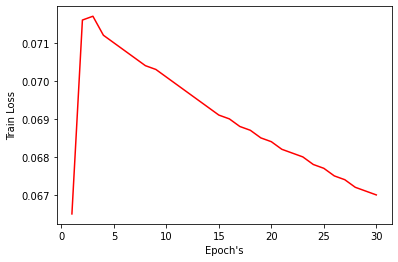

In [ ]:
itr = list(range(1, 31))
loss = [0.0665, 0.0716, 0.0717, 0.0712, 0.0710, 0.0708, 0.0706, 0.0704, 0.0703, 0.0701, 0.0699, 0.0697, 0.0695, 0.0693, 0.0691, 0.0690, 0.0688, 0.0687, 0.0685, 0.0684, 0.0682, 0.0681, 0.0680, 0.0678, 0.0677, 0.0675, 0.0674, 0.0672, 0.0671, 0.0670 ]

plt.plot(itr, loss, color='red')
plt.xlabel("Epoch's")
plt.ylabel("Train Loss")

In [ ]:
def evaluate(context, answer):

    inp_sentence = tokenizer.convert_tokens_to_ids(["[CLS]"] + tokenizer.tokenize(context) + ["[SEP]"] + tokenizer.tokenize(answer) + ["[SEP]"])
    enc_input = tf.expand_dims(inp_sentence, axis=0)
    
    output = tf.expand_dims([101], axis=0)
    
    for _ in range(96):
        predictions, weights = transformer(enc_input, output, False)
        
        prediction = predictions[:, -1:, :]
        
        predicted_id = tf.cast(tf.argmax(prediction, axis=-1), tf.int32)
        
        if predicted_id == 102:
            return tf.squeeze(output, axis=0), weights
        
        output = tf.concat([output, predicted_id], axis=-1)
        
    return tf.squeeze(output, axis=0), weights

In [ ]:
def generate_ques(context, answer):
    output, weights = evaluate(context, answer)
    
    output = output.numpy()
    predicted_sentence = tokenizer.convert_ids_to_tokens([i for i in output if i != 101 and i != 102])

    return ' '.join(predicted_sentence), weights

In [ ]:
X = clean_sent(train_df.iloc[8]['context'])
Y = clean_sent(train_df.iloc[8]['answer'])
Z = clean_sent(train_df.iloc[8]['question'])

X, Y, Z

("The Mass of Paul VI was also in Latin but approval was given for the use of vernacular languages. There had been other instructions issued by the Pope in and which centered on the reform of all liturgies of the Roman Church. These major reforms were not welcomed by all and in all countries. The sudden apparent outlawing of the year old Mass the last typical edition of which being promulgated only a few years earlier in by Paul's predecessor Pope John XXIII was not always explained well. Further experimentation with the new Mass by liturgists such as the usage of pop folk music as opposed to the Gregorian Chant advocated by Pope Pius X along with concurrent changes in the order of sanctuaries was viewed by some as vandalism. In Pope Benedict XVI clarified that the Mass of John XXIII and the Mass of Paul VI are two forms of the same Roman Rite the first which had never been juridically abrogated now being an extraordinary form of the Roman Rite while the other obviously is and continue

In [ ]:
result = generate_ques(X, Y)
result[0]

'what was the name of the cultural association that wanted to build a term ##inator statue ?'

In [ ]:
X = clean_sent("President Donald Trump said and predicted that some states would reopen this month.")
Y = clean_sent("Donald Trump")

X, Y

('President Donald Trump said and predicted that some states would reopen this month.',
 'Donald Trump')

In [ ]:
result = generate_ques(X, Y)
result[0]

'what was the name of the cultural development that defined the black american literary canon ?'

In [ ]:
#Calculate f1 score, EM, and SPS(Semantic preserved similarity)

In [ ]:
test_df = pd.read_csv('dataset/squad_test.csv', nrows=1000)
test_df.shape

(1000, 3)

In [ ]:
# qg = []
# for i in range(len(test_df)):

#   X = clean_sent(test_df.iloc[i]['context'])
#   Y = clean_sent(test_df.iloc[i]['answer'])
#   qg.append(generate_ques(X, Y))

In [ ]:
# pred_df = pd.DataFrame(qg, columns=['prediction'])
# pred_df.head()

,prediction
0,what was the name of the cultural development ...
1,what is the name of the border col ##lie that ...
2,what is the name of the popular album released...
3,what is the name of the popular album released...
4,what was henry viii trying to avoid by creatin...


In [ ]:
# pred_save_path = '/content/drive/My Drive/Text Mining TDDE16/dataset/baseline_pred.csv'

# pred_df.to_csv(pred_save_path, index = False)

In [ ]:
pred_df = pd.read_csv('dataset/baseline_pred.csv')
pred_df.shape

(1000, 1)

In [ ]:
!pip install --quiet tqdm

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
precision = []
recall = []
f1 = []

for i in tqdm(range(len(test_df))):

  Z = clean_sent(test_df.iloc[i]['question'])
  W = pred_df.iloc[i]['prediction']

  gold = set(Z.lower().split())
  pred = set(W.lower().split())

  p = len(gold & pred)/len(pred)
  precision.append(p)
  rc = len(gold & pred)/len(gold)
  recall.append(rc)

  if p + rc == 0:
    f1.append(0.0)
    continue
  f1.append(2 * (p * rc) / (p + rc))

print('Precision score: ', sum(precision)/len(test_df))
print('Recall score: ', sum(recall)/len(test_df))
print('F1 Score: ', sum(f1)/len(test_df))

  0%|          | 0/1000 [00:00<?, ?it/s]

Precision score:  0.13352300645261153
Recall score:  0.18632638675375435
F1 Score:  0.15065694897821394


In [ ]:
# Try training on smaller dataset and higher epochs for more accurate results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

plt.style.use('seaborn')

def plot_attention(x, y):
  
    ques, attention = generate_ques(x, y)

    attention = tf.squeeze(attention, 0)
    attention = attention[0]

    fig, ax = plt.subplots()
    heatmap = ax.pcolor(attention, cmap='GnBu_r')

    L = ['<start>']
    ax.set_xticklabels(L+ques.split(), minor=False, rotation='vertical')
    ax.set_yticklabels(L+(x+' '+y).split(), minor=False)

    ax.xaxis.tick_top()
    ax.set_xticks(np.arange(attention.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(attention.shape[0]) + 0.5, minor=False)
    ax.invert_yaxis()

    plt.colorbar(heatmap)

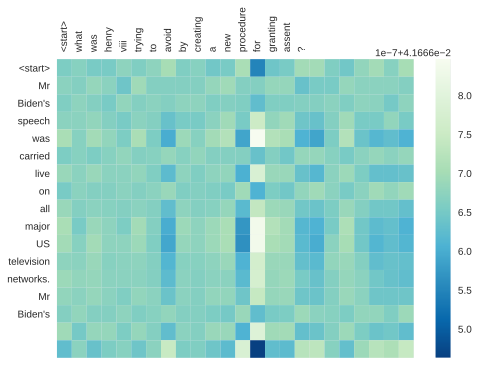

In [ ]:
plot_attention("Mr Biden's speech was carried live on all major US television networks.", "Mr Biden's")

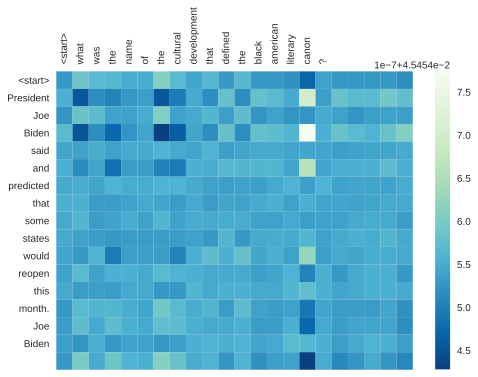

In [ ]:
plot_attention('President Joe Biden said and predicted that some states would reopen this month.', 'Joe Biden')